# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [203]:
#Student Name: Prathamesh

# Library for the following
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Explore and Clean the Data
# Explore the data and clean the data if necessary. For example, remove abnormal instanaces and replace missing values.

# Loading dataset
data = pd.read_csv('Mobile_Price_Data.csv')

# Checking for missing values + removing them
missing_values = data.isnull().sum()
data.dropna(inplace=True)

# Checking for duplicate rows + remove them
duplicates_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)

# Checking for duplicate rows after removal
duplicates_after = data.duplicated().sum()

print("Step 1: Explore and Clean the Data")
print("Missing values:", missing_values)
print("Duplicate rows before removal:", duplicates_before)
print("Duplicate rows after removal:", duplicates_after)

Step 1: Explore and Clean the Data
Missing values: battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64
Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [212]:
# Step 2: Study the Correlation and Select Variables
# Study the correlation between 'price range' with other features. And select the variables that you think are helpful for predicting the price range.

# Analysing correlation between 'price range' and other features
data.corr()['price_range'].sort_values(ascending=False)
price_corr = data.corr()['price_range'].sort_values(ascending=False)

# Selecting variables for predicting the price range
selected_features = price_corr[abs(price_corr) > 0.2].index.tolist()
selected_features.remove('price_range') 

print("Step 2: Study the Correlation and Select Variables")
print("Selected features for predicting the price range. ", selected_features)


Step 2: Study the Correlation and Select Variables
Selected features for predicting the price range.  ['ram', 'battery_power']


In [208]:
# Step 3: Split the Dataset
# Split the dataset (Trainging set : Test set = 8 : 2)

# Spliting the dataset into features (X) and target variable (y)
X = data[selected_features]
y = data['price_range']

# Spliting the dataset into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 3: Split the Dataset")
print("Shape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)
print("Shape of training set (y_train):", y_train.shape)
print("Shape of testing set (y_test):", y_test.shape)

Step 3: Split the Dataset
Shape of training set (X_train): (1596, 2)
Shape of testing set (X_test): (399, 2)
Shape of training set (y_train): (1596,)
Shape of testing set (y_test): (399,)


In [213]:
# Step 4: Train a Logistic Regression Model
# Train a logistic regression model to predict 'price range' based on the selected features (from the second step). Calculate the accuracy of your model. (You are required to report the accuracy from both training set and test set.) Explain your model and evaluate its performance (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

# Defining pipeline with imputer + Logistic Regression model
logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Training pipeline on the data
logistic_pipeline.fit(X_train, y_train)

# Predictions on training + testing sets for logistic regression
train_predictions_logistic = logistic_pipeline.predict(X_train)
test_predictions_logistic = logistic_pipeline.predict(X_test)

# Calculating accuracy on training + testing sets for logistic regression
train_accuracy_logistic = accuracy_score(y_train, train_predictions_logistic)
test_accuracy_logistic = accuracy_score(y_test, test_predictions_logistic)

print("Step 4: Train a Logistic Regression Model")
print("Accuracy on training set (Logistic Regression):", train_accuracy_logistic)
print("Accuracy on testing set (Logistic Regression):", test_accuracy_logistic)
print("""
Explanation of Model:
The logistical regression model is trained to predict the price range based on the RAM and battery power of the phone. These variables were chosen due to their correlation with price range
being positive (RAM = 0.917131 | Battery = 0.2026520). It is important to note that all but 3 features were positive but we believe that RAM and Battery power were the most appropriate to
use based on them having highest correlation value. 

Evaluation of Model:
The model performs well with an accuracy over 84% on the testing set and 81% on the training set. The testing set having a higher accuracy rating suggests that the model generalises well to unseen data.
This model can be improved by conducting a further detailed analyis of the features and their relationship with the price range.
""")


Step 4: Train a Logistic Regression Model
Accuracy on training set (Logistic Regression): 0.818295739348371
Accuracy on testing set (Logistic Regression): 0.8421052631578947

Explanation of Model:
The logistical regression model is trained to predict the price range based on the RAM and battery power of the phone. These variables were chosen due to their correlation with price range
being positive (RAM = 0.917131 | Battery = 0.2026520). It is important to note that all but 3 features were positive but we believe that RAM and Battery power were the most appropriate to
use based on them having highest correlation value. 

Evaluation of Model:
The model performs well with an accuracy over 84% on the testing set and 81% on the training set. The testing set having a higher accuracy rating suggests that the model generalises well to unseen data.
This model can be improved by conducting a further detailed analyis of the features and their relationship with the price range.



In [214]:
# Step 5: Train a KNN Model
# Train a KNN model to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. Calculate the accuracy of your model. (You are required to report the accuracy from both training set and test set.)

# Defining a pipeline with imputer + KNN model
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Training the pipeline on the data
knn_pipeline.fit(X_train, y_train)

# Predictions on training + testing sets for KNN
train_predictions_knn = knn_pipeline.predict(X_train)
test_predictions_knn = knn_pipeline.predict(X_test)

# Calculating the accuracy on training + testing sets for KNN
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)

print("Step 5: Train a KNN Model")
print("Accuracy on training set (KNN):", train_accuracy_knn)
print("Accuracy on testing set (KNN):", test_accuracy_knn)


Step 5: Train a KNN Model
Accuracy on training set (KNN): 0.8439849624060151
Accuracy on testing set (KNN): 0.7894736842105263


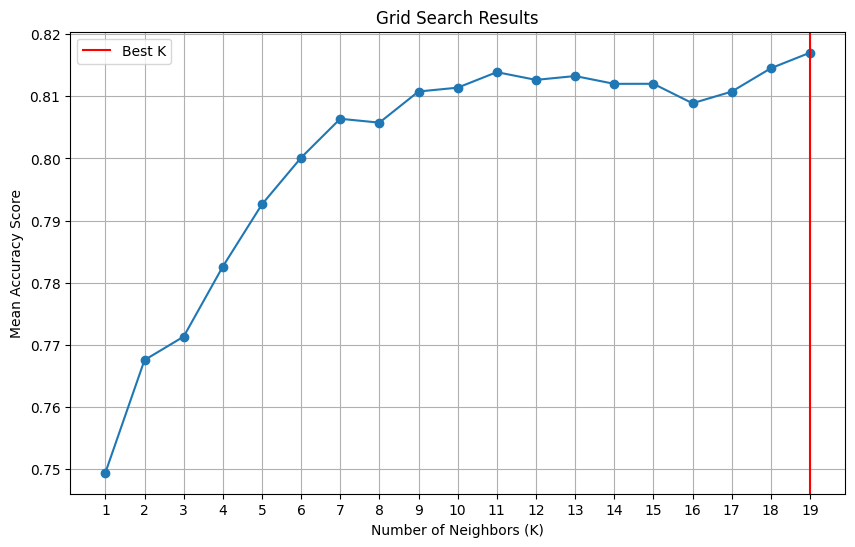

Step 6: Tune the Hyper-parameter K in KNN and Visualize the Results
Best value of K found by GridSearchCV: 19
Accuracy on training set (Final KNN): 0.8320802005012531
Accuracy on testing set (Final KNN): 0.8270676691729323

The results indicate that the accuracy on btoh the training set and the testing set is highest when K is equal to 19. The influence that K has on prediction performance in KNN is crucial.
A smaller value of K usually leads to more complex decision boundaries and can result in overfitting. A largeer value of K tends to smooth out the decision boundaries which can lead to underfitting. 




In [215]:
# Step 6: Tune the Hyper-parameter K in KNN and Visualize the Results
# Tune the hyper-parameter K in KNN (Hints: GridsearchCV),visualize the results and explain how K influences the prediction performance.

from sklearn.model_selection import GridSearchCV

# Defining a range of K values to search
param_grid = {'n_neighbors': np.arange(1, 20)}

# Initialising KNN model
knn_model = KNeighborsClassifier()

# GridSearchCV to find the best value of K
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best value of K
best_k = grid_search.best_params_['n_neighbors']

# Visualising the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-')
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy Score')
plt.xticks(np.arange(1, 20, step=1))
plt.axvline(x=best_k, color='red', label='Best K')
plt.legend()
plt.grid(True)
plt.show()

# Training final KNN model with the best value of K
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)

# Predictions on training + testing sets for final KNN model
train_predictions_final_knn = final_knn_model.predict(X_train)
test_predictions_final_knn = final_knn_model.predict(X_test)

# Calculatung accuracy on training + testing sets for the final KNN model
train_accuracy_final_knn = accuracy_score(y_train, train_predictions_final_knn)
test_accuracy_final_knn = accuracy_score(y_test, test_predictions_final_knn)

# Printing accuracy of final KNN model
print("Step 6: Tune the Hyper-parameter K in KNN and Visualize the Results")
print("Best value of K found by GridSearchCV:", best_k)
print("Accuracy on training set (Final KNN):", train_accuracy_final_knn)
print("Accuracy on testing set (Final KNN):", test_accuracy_final_knn)
print("""
The results indicate that the accuracy on btoh the training set and the testing set is highest when K is equal to 19. The influence that K has on prediction performance in KNN is crucial.
A smaller value of K usually leads to more complex decision boundaries and can result in overfitting. A largeer value of K tends to smooth out the decision boundaries which can lead to underfitting. 
""")
